# Young people Survey:Youth  Spending on Healthy food
## 1.Overview

The author of the dataset is  Miroslav Sabo.The survey titled 'Young people survey' is aimed at finding out the preferences, interests,habits and perceptions on many topics like spending,whether they reported living a healthy lifestyle, personal information, their views on life etc.FOr this assignment we will be studying about individuals in the datset and will be finding out  whether they will end up spending on healthy food.

The survey was created by Students of Statistics Fakulta sociálnych a ekonomických vied UK which is a school in Bratislava, Slovakia.The research questions consists of numerical score in following group: music preferences,movie preferences,interests,phobias,healthy habits,outlook towards life,personality traits and demographic data of the survey takers.The dataset has 1010 rows and 150 columns(out of which 139 are integeral and 11 are categorical.)he survey was presented both in electronic and written form.It was orginally taken in Slovak language and later was translated to English.
The age of participants is  15-30 years.


<br/>
We are going to break break this notebook into the following sections:
<ol>
    <li>Data Processing </li>
    <li>Data Exploration and Visualization</li>
    <li>Data Classification</li>
    <li>Prediction and accuracy</li>
</ol>

<b>(d)what software did you use and why did you choose it?</b>

I used Jupyter notebook because it is offline and I can put my code and analysis in the same place.I dont have to context switch.It can be run on any computer not even requires internet connection.It autogenerates a  HTML etc which it can be viewed on any browser and thus any kind of machine.The code and it's output/analysis can be seen right below the other

The following questions will be answered below:
Questions:<br/><br/>
  (a)What is your	data	and	task?(In writeup)	<br/>
 (b)what ML	solution did	you	 choose	and,	most	importantly, why was this an appropriate	choice?(Part 2)<br/>
(c)how	did	you	choose	to	evaluate	 success?(Part 5.2.1 & 5.2.2)<br/>
(d)what	software	did	you	use	and	why	did	you	choose	it?<br/>
(e)what	are	the	results?(Part 5)<br/>
(f)show	 some	examples	from	the	development	data that	your	approach got	correct	and	some	it	got	wrong:	if	you	were to	try	to	fix	the	ones it	got	wrong, what	would you do?(Part 6)






## 2.Data Preprocessing
Here we are going to classify the dtaa into various subframes and also handle missing values and perform operations to clean the data as we will present several visualisation to improve that data has become better.

In [180]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import recall_score, precision_score
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from IPython.display import Image
from os import path
from sklearn.preprocessing import Imputer

In [265]:
data = pd.read_csv('responses.csv')
columns = pd.read_csv('columns.csv')

Showing the dataset captured which is in responses.csv

In [182]:
pd.set_option('display.max_columns',200)
data.head(10)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

This is how are data looks like before preprocessing shown are all the columns and their value distribution of each of them.

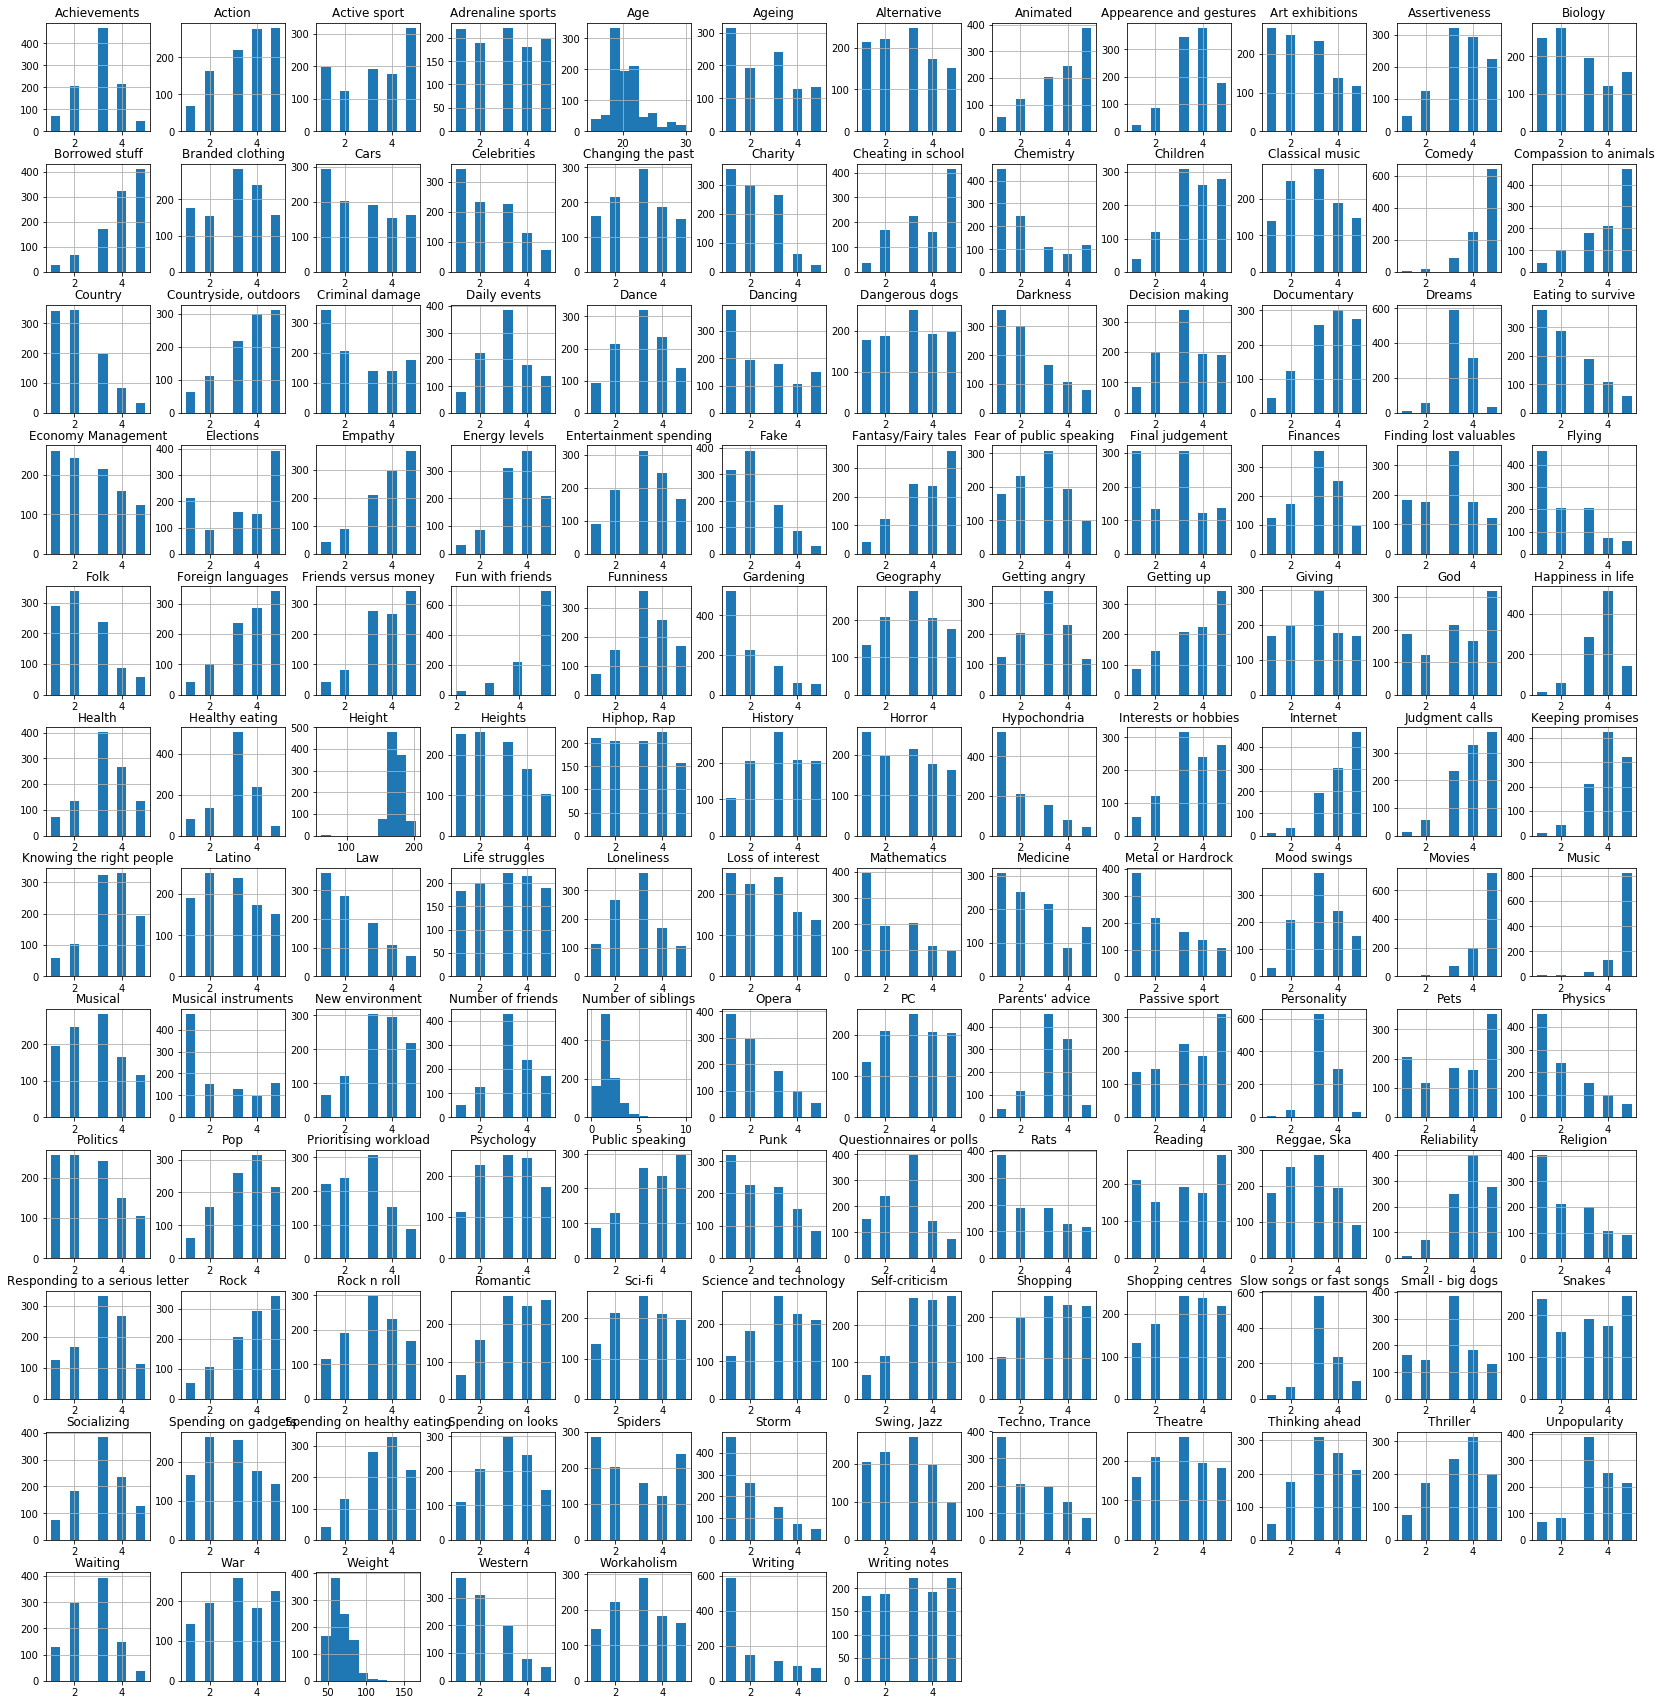

In [183]:
data.hist()
fig = plt.gcf()
fig.set_size_inches(28.5, 30.5)
plt.show()

In [184]:
data = data.replace("NaN", np.nan)
data = data.replace("nan", np.nan)

As the data can be categroised into:<br/>
1.Music Features<br/>
2.Movies Features<br/>
3.Hobbies and interests<br/>
4.Phobias <br/>
5.Health habits<br/>
6.Persoanlity traits(includes outlook towards life)<br/>
7.Spending habits <br/>
8.Demographics<br/>
<br/>
<br/>
<b> Hence we will form dataframe of each and process it one by one.To clean and enhance the dataset

In [185]:
music = data.iloc[:,0:19] 
movies = data.iloc[:,19:31] 
phobias = data.iloc[:,63:73] 
hobbies = data.iloc[:,31:63] 
health = data.iloc[:,73:76] 
personal = data.iloc[:, 76:133] 
spending = data.iloc[:,133:140]
demo = data.iloc[:,140:150] 

## 2.1 The Music SubFrame

In [186]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(music)
music_data = imp.transform(music)
music = pd.DataFrame(data=music_data[:,:],index=[i for i in range((len(music_data)))],columns=music.columns.tolist())

In [187]:
music.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.732673,3.327723,3.112871,2.287129,2.122772,2.956436,2.762376,3.473267,3.763366,2.360396,2.452475,2.910891,2.771287,2.761386,3.140594,2.829703,2.843564,2.336634,2.139604
std,0.663222,0.833232,1.168268,1.136271,1.073501,1.248223,1.259639,1.160029,1.181474,1.371093,1.296568,1.372959,1.210365,1.254326,1.233026,1.342567,1.322701,1.319798,1.183516
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## 2.2 The Movies Subframe 

In [188]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(movies)
movie_data = imp.transform(movies)
movies = pd.DataFrame(data=movie_data[:,:],index=[i for i in range((len(movie_data)))],columns=movies.columns.tolist())

In [189]:
movies.describe()

,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.615842,2.794059,3.384158,4.496040,3.491089,3.112871,3.155446,3.750495,3.789109,3.646535,2.125743,3.537624
std,0.693268,1.409709,1.197514,0.779116,1.208009,1.310600,1.346947,1.180081,1.217676,1.129307,1.136401,1.235047
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1.000000,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,1.000000,3.000000
50%,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,4.000000
75%,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,3.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## 2.3 The Hobbies subframe

In [190]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(hobbies)
hobbies_data = imp.transform(hobbies)
length=len(hobbies_data)
hobbies = pd.DataFrame(data=hobbies_data[:,:],
                     index=[i for i in range(0,len(hobbies_data))],
                     columns=hobbies.columns.tolist())

In [191]:
hobbies.describe()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
count,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,3.206931,3.137624,2.59505,2.333663,2.064356,4.175248,3.135644,2.640594,2.661386,2.163366,3.158416,3.082178,3.779208,2.513861,2.256436,2.688119,2.586139,2.272277,3.689109,2.460396,2.323762,1.89604,3.382178,3.290099,1.900990,2.361386,3.276238,3.232673,3.024752,4.559406,2.948515,3.337624
std,1.262304,1.255265,1.29395,1.350607,1.225278,0.918902,1.317872,1.344716,1.380953,1.371537,1.491520,1.276524,1.138463,1.377400,1.242054,1.438104,1.318845,1.317761,1.192303,1.448459,1.512135,1.28577,1.395334,1.501239,1.173755,1.269094,1.284940,1.278906,1.320112,0.736245,1.418874,1.542869
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,2.000000,1.00000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.00000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
50%,3.000000,3.000000,2.00000,2.000000,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.00000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,5.000000,3.000000,4.000000
75%,4.000000,4.000000,4.00000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,3.00000,5.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## 2.4 The phobias SubFrame

In [192]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(phobias)
phobia_data = imp.transform(phobias)
length=len(phobia_data)
phobias = pd.DataFrame(data=phobia_data[:,:],
                     index=[i for i in range(0,len(phobia_data))],
                     columns=phobias.columns.tolist())

In [193]:
phobias.describe()

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,2.061386,1.973267,2.250495,2.613861,2.826733,3.027723,2.407921,2.580198,3.042574,2.803960
std,1.209556,1.163654,1.253587,1.293962,1.539914,1.500982,1.398689,1.385900,1.366152,1.214051
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000
75%,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## 2.5 The health SubFrame

In [194]:
health['Smoking'].unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [195]:
#Ref:https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html
health['Smoking'] = health['Smoking'].map({'never smoked': 1, 'tried smoking': 2,'former smoker':3,'current smoker':4})

In [196]:
health['Alcohol'].unique()

array(['drink a lot', 'social drinker', 'never', nan], dtype=object)

In [197]:
health['Alcohol'] = health['Alcohol'].map({'drink a lot': 1, 'social drinker': 2,'never':3})

In [198]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(health)
health_data = imp.transform(health)
length=len(health_data)
health = pd.DataFrame(data=health_data[:,:],
                     index=[i for i in range(0,len(health_data))],
                     columns=health.columns.tolist())

In [199]:
health.describe()

,Smoking,Alcohol,Healthy eating
count,1010.000000,1010.000000,1010.000000
mean,2.341584,1.902970,3.031683
std,1.006005,0.577486,0.935473
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000
50%,2.000000,2.000000,3.000000
75%,3.000000,2.000000,4.000000
max,4.000000,3.000000,5.000000


## 2.6 The personal SubFrame

Selecting categorical Columns first and then wechange them to integral values to have uniformity in dataset which helps in Classification and Visualisation as we will see later on.

In [200]:
personal['Punctuality'].unique()

array(['i am always on time', 'i am often early',
       'i am often running late', nan], dtype=object)

In [201]:
personal['Punctuality'] = personal['Punctuality'].map({'i am always on time': 1, 'i am often early': 2,'i am often running late':3})

In [202]:
personal['Lying'].unique()

array(['never', 'sometimes', 'only to avoid hurting someone',
       'everytime it suits me', nan], dtype=object)

In [203]:
personal['Lying'] = personal['Lying'].map({'never': 1, 'sometimes': 2,'only to avoid hurting someone':3,'everytime it suits me':4})

In [204]:
personal['Internet usage'].unique()

array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

In [205]:
personal['Internet usage'] = personal['Internet usage'].map({'few hours a day': 1, 'most of the day': 2,'less than an hour a day':3,'no time at all':4})

In [206]:
#Ref:http://scikit-learn.org/stable/auto_examples/plot_missing_values.html#sphx-glr-auto-examples-plot-missing-values-py
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(personal)
personal_data = imp.transform(personal)
length=len(personal_data)
#Ref:https://pandas.pydata.org/pandas-docs/stable/dsintro.html
personal = pd.DataFrame(data=personal_data[:,:],
                     index=[i for i in range(0,len(personal_data))],
                     columns=personal.columns.tolist())


In [207]:
personal.describe()

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,3.074257,2.647525,3.083168,2.996040,3.412871,2.651485,3.859406,3.987129,2.709901,3.780198,3.292079,2.130693,2.60000,3.197030,3.416832,3.581188,3.987129,1.908911,3.859406,2.228713,2.976238,3.971287,4.017822,2.887129,3.745545,3.250495,2.952475,3.30198,3.297030,2.103960,3.343564,1.884158,2.490099,2.673267,3.476238,3.257426,3.599010,3.157426,2.963366,3.070297,3.622772,3.519802,3.014851,3.487129,3.522772,3.460396,3.031683,3.706931,3.635644,2.973267,3.291089,2.872277,3.594059,3.552475,3.265347,2.749505,1.406931
std,1.114563,1.217855,1.406136,1.274117,1.135442,1.374885,0.931784,0.898646,1.351137,1.121554,1.126682,1.046372,1.50005,1.198691,1.572658,1.190415,0.969726,1.156539,1.128966,1.214452,1.305409,1.185545,1.051536,1.131201,1.251206,1.074815,1.277122,1.48160,0.683148,1.029825,1.055348,0.813322,0.790429,1.001574,1.151519,1.042729,0.942657,1.090535,0.934762,1.168639,1.118932,1.102346,1.171506,1.091608,1.267094,1.116999,1.372600,0.822896,0.999463,1.220196,0.642422,1.241232,1.306978,1.169364,0.864959,1.099430,0.731394
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.00000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.00000,3.000000,1.000000,3.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000,2.00000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,2.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.00000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.

## 2.7 The Demographics Subframe

In [208]:
demo['House - block of flats'].unique()

array(['block of flats', 'house/bungalow', nan], dtype=object)

In [209]:
demo['House - block of flats'] = demo['House - block of flats'].map({'block of flats': 1, 'house/bungalow': 2})

In [210]:
demo['Village - town'].unique()

array(['village', 'city', nan], dtype=object)

In [211]:
demo['Village - town'] = demo['Village - town'].map({'village': 1, 'city': 2})

In [212]:
demo['Gender'] = demo['Gender'].map({'male': 1, 'female': 2})

In [213]:
demo['Education'].unique()

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil', nan], dtype=object)

In [214]:
demo['Education'] = demo['Education'].map({'currently a primary school pupil':1,'primary school' :2,
                                           'secondary school':3,'college/bachelor degree':4,
                                           'masters degree':5,'doctorate degree':6})

In [215]:
demo['Only child'] = demo['Only child'].map({'yes':1,'no':0})

In [216]:
demo['Left - right handed'] = demo['Left - right handed'].map({'left handed':1,'right handed':2})

In [217]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(demo)
demo_data = imp.transform(demo)
length=len(demo_data)
demo = pd.DataFrame(data=demo_data[:,:],
                     index=[i for i in range(0,len(demo_data))],
                     columns=demo.columns.tolist())

In [218]:
demo.describe()

,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,20.430693,173.503960,66.357426,1.29604,1.593069,1.900000,3.286139,0.251485,1.703960,1.406931
std,2.819240,9.924916,13.705814,1.01059,0.491505,0.300149,0.782810,0.434082,0.456735,0.491505
min,15.000000,62.000000,41.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,19.000000,167.000000,56.000000,1.00000,1.000000,2.000000,3.000000,0.000000,1.000000,1.000000
50%,20.000000,173.000000,64.000000,1.00000,2.000000,2.000000,3.000000,0.000000,2.000000,1.000000
75%,22.000000,180.000000,75.000000,2.00000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000
max,30.000000,203.000000,165.000000,10.00000,2.000000,2.000000,6.000000,1.000000,2.000000,2.000000


## 2.8 The Spending Subframe 

In [219]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(spending)
spending_data = imp.transform(spending)
length=len(spending_data)
spending = pd.DataFrame(data=spending_data[:,:],
                     index=[i for i in range(0,len(spending_data))],
                     columns=spending.columns.tolist())

In [220]:
spending.describe()

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,3.023762,3.233663,3.050495,3.200990,3.105941,2.870297,3.558416
std,1.142663,1.321791,1.305028,1.187229,1.203589,1.284970,1.092842
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [221]:
dfs = [demo,hobbies,phobias,health,personal,spending,music,movies]
new_data = pd.concat( dfs,axis=1)

In [222]:
new_data

,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,20.0,163.0,48.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,1.0,3.0,2.0,1.0,1.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,2.0,3.0,1.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,1.0,3.0,4.0,5.0,3.0,3.0,1.0,3.0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,19.0,163.0,58.0,2.0,2.0,2.0,4.0,0.0,2.0,1.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3.0,1.0,3.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,1.0,3.0,4.0,1.0,4.0,2.0,5.0,2.0,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,20.0,176.0,67.0,2.0,2.0,2.0,3.0,0.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1.0,3.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,1.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,22.0,172.0,59.0,1.0,2.0,2.0,4.0,1.0,2.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,1.0,3.0,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3

## 3.Exploratory Data Analysis

A look at the dataframe to get insight on the Data and features inside so as to help us in performing operations later.

In [223]:
print(new_data.describe())

               Age       Height       Weight  Number of siblings       Gender  \
count  1010.000000  1010.000000  1010.000000          1010.00000  1010.000000   
mean     20.430693   173.503960    66.357426             1.29604     1.593069   
std       2.819240     9.924916    13.705814             1.01059     0.491505   
min      15.000000    62.000000    41.000000             0.00000     1.000000   
25%      19.000000   167.000000    56.000000             1.00000     1.000000   
50%      20.000000   173.000000    64.000000             1.00000     2.000000   
75%      22.000000   180.000000    75.000000             2.00000     2.000000   
max      30.000000   203.000000   165.000000            10.00000     2.000000   

       Left - right handed    Education   Only child  Village - town  \
count          1010.000000  1010.000000  1010.000000     1010.000000   
mean              1.900000     3.286139     0.251485        1.703960   
std               0.300149     0.782810     0.434082  

As we can see from below that there's uniformity in data types

In [224]:
print(new_data.columns, new_data.dtypes)

(Index([u'Age', u'Height', u'Weight', u'Number of siblings', u'Gender',
       u'Left - right handed', u'Education', u'Only child', u'Village - town',
       u'House - block of flats',
       ...
       u'Thriller', u'Comedy', u'Romantic', u'Sci-fi', u'War',
       u'Fantasy/Fairy tales', u'Animated', u'Documentary', u'Western',
       u'Action'],
      dtype='object', length=150), Age                         float64
Height                      float64
Weight                      float64
Number of siblings          float64
Gender                      float64
Left - right handed         float64
Education                   float64
Only child                  float64
Village - town              float64
House - block of flats      float64
History                     float64
Psychology                  float64
Politics                    float64
Mathematics                 float64
Physics                     float64
Internet                    float64
PC                          float64
Eco

Taking a look at value distribution of the  target feature.It does'nt seem normally distributed as per the graph below.

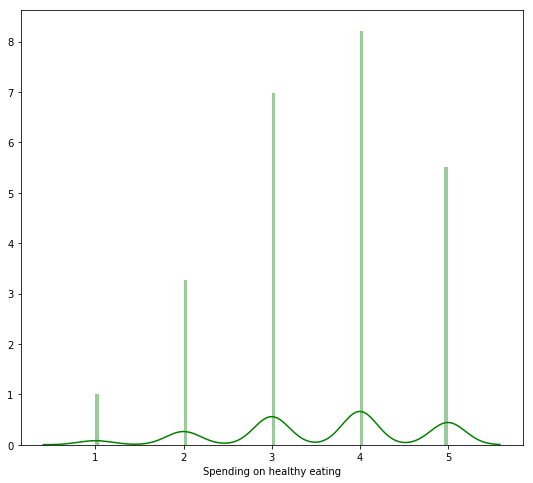

In [225]:
plt.figure(figsize=(9, 8))
sns.distplot(new_data['Spending on healthy eating'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [226]:
def correlation_plot(var_of_interest, df_main, figsize = (10,30)):
    def calc_corr(var_of_interest, df, cols, figsize): 
        vals = []
        lbls = []
        for col in cols:
            #getting the coefficient of each column using pandas function 
            vals.append(df[col].corr( df[var_of_interest]))
            lbls.append(col)
        # as all we care about is Features and their Correlation values for the plot    
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        # to show the correlations in sorted order
        corrs = corrs.sort_values(by='corr_values')
        fig, axis = plt.subplots(figsize= figsize)
        axis.set_title("Correlation coeff. of the featues")
        #Ref:https://seaborn.pydata.org/generated/seaborn.barplot.html to plot coefficients of columns
        sns.barplot(x=corrs.corr_values, y=corrs['features'], ax=axis)
        axis.set_ylabel("Correlation Coefficients(Float values)")
        return corrs
    df = copy.deepcopy(df_main)
    #removing noisy data for final time to get clarity in the visualisation
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    #removing the column to analyse from 
    cols_floats.remove(var_of_interest)
    corrs = calc_corr(var_of_interest, df, cols_floats, figsize)
    return corrs

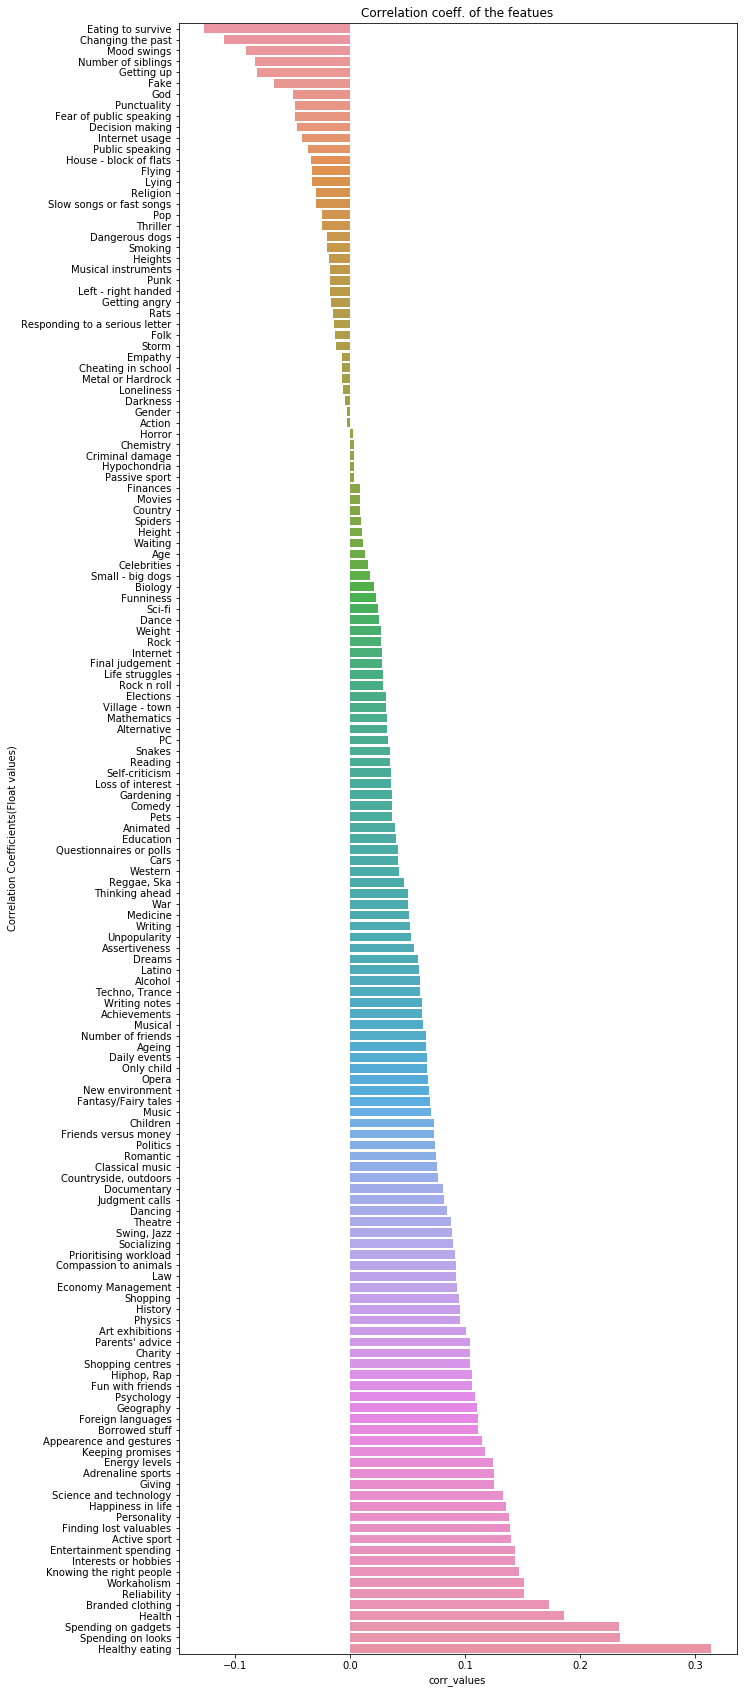

In [227]:
var_of_interest = 'Spending on healthy eating'
corrs_area = correlation_plot(var_of_interest, new_data)

Taking mean of values of actual  dataset to know the distribution of original dataset and then cross checking after making predictions

In [228]:
spending['Spending on healthy eating'].describe()

count    1010.000000
mean        3.558416
std         1.092842
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Spending on healthy eating, dtype: float64

#### <b>3.1   Analysing for various datasets to check similarity and degree to which the target variable depends on them.That means,how much of target varibale value be showing variation for different kind of features.</b>

Analysing how much of Alcoholic and Smokers will spend on healthy eating what is the variation among them with respect to the target variable

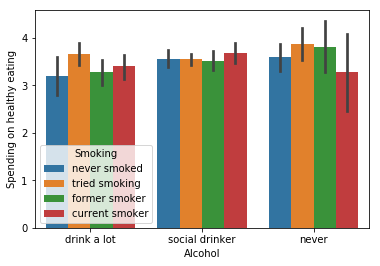

In [229]:
sns.barplot(x="Alcohol", y="Spending on healthy eating", hue="Smoking", data=data )

<b> Explaination</b>
<br/>
As we can see here that people who have never had alchohol and have been former smokers spend more on healthy eating.These insights will help us during classification and prediction later on.

Here I have taken another feature to get insight on How the education and the place where they stay either village or town is likely to depend on they spending on Healthy eating

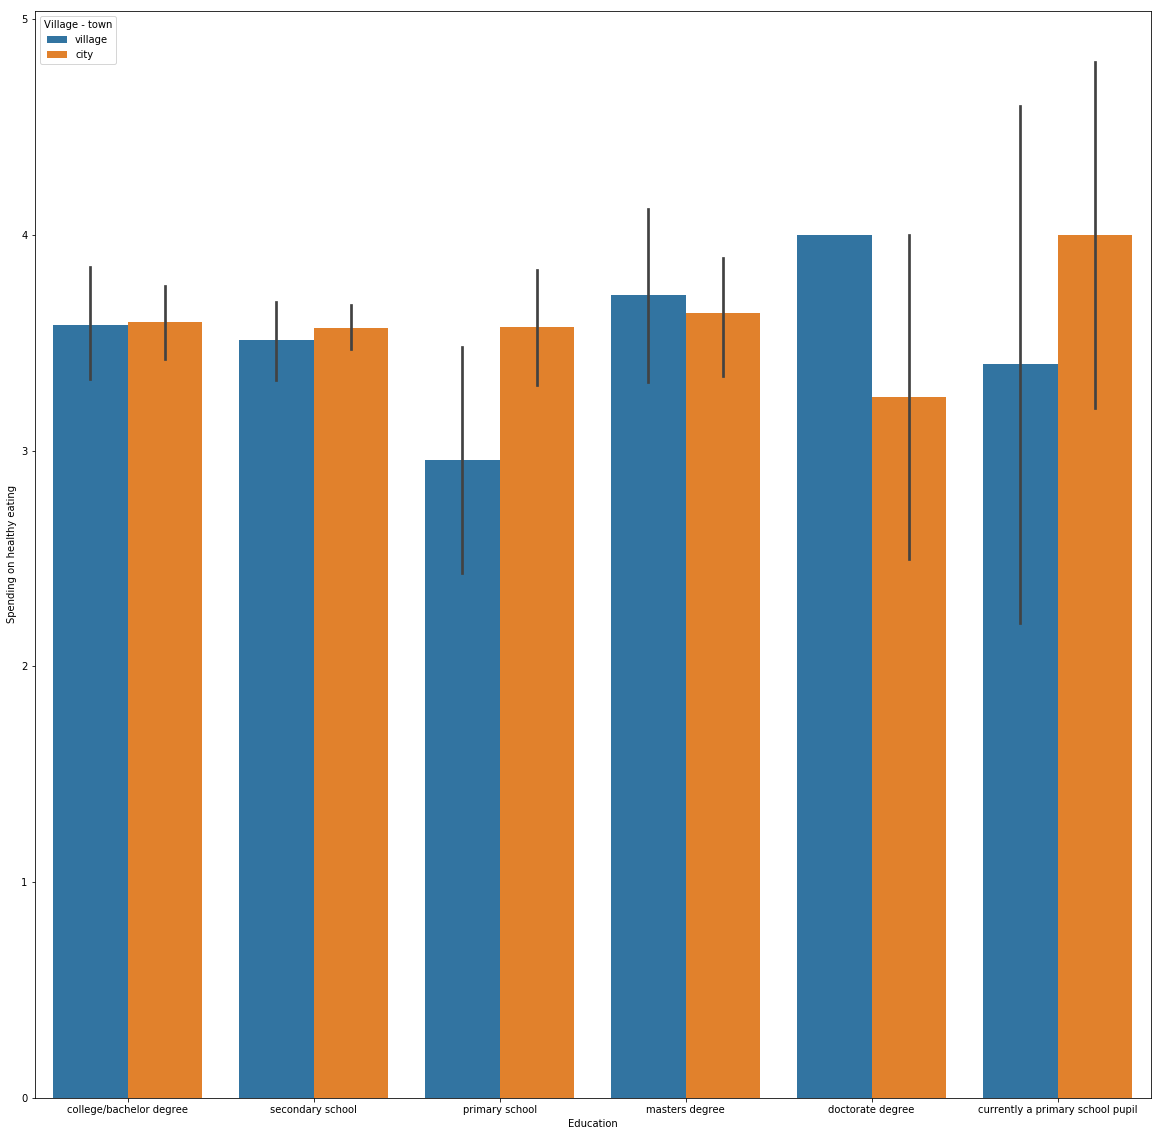

In [230]:
plt.subplots(figsize=(20,20))
sns.barplot(x="Education", y="Spending on healthy eating", hue="Village - town", data=data )

<b> Explaination</b>
<br/>
As we can see here that people are doing doctrate degree in a village and primary school pupil in city are most likely to spend on healthy food than others.

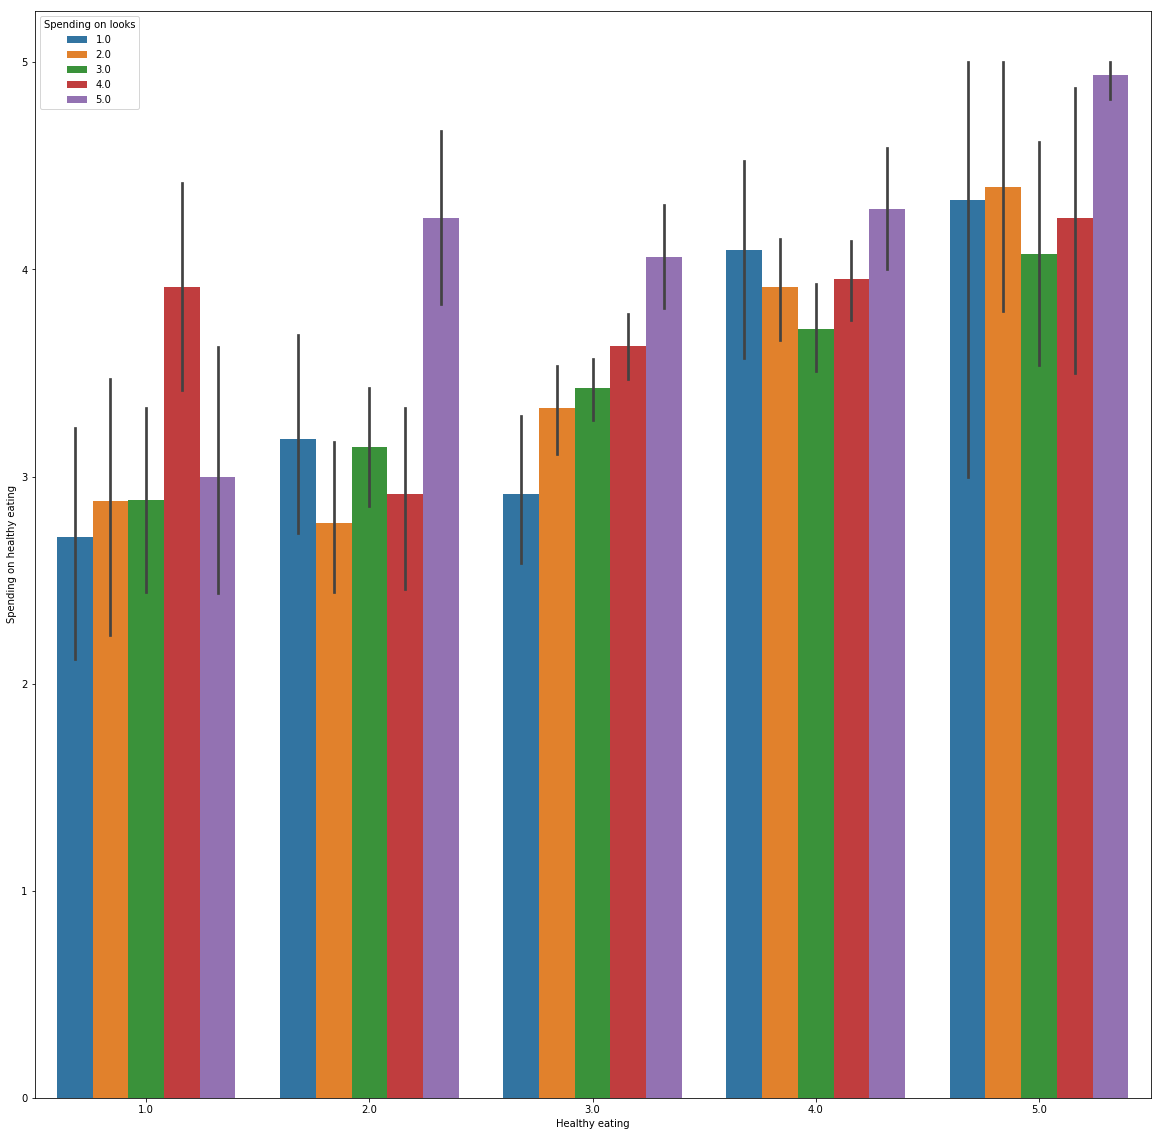

In [231]:
plt.subplots(figsize=(20,20))
sns.barplot(x="Healthy eating", y="Spending on healthy eating", hue="Spending on looks", data=data )

<b> Explaination</b>
<br/>
As we can see here that people who practice healthy eating and spend on looks spend the "most" on healthy eating as compared to all other user types in the plot.

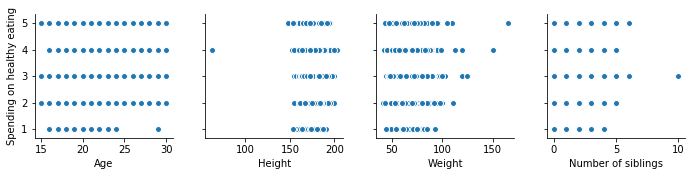

In [232]:
cols = ['Age', 'Height', 'Weight', 'Number of siblings']
for i in range(0, len(cols),5):
    #sns.pairplot(data=new_data,x_vars=new_data.columns[i:i+5], y_vars=['Spending on healthy eating'])
    sns.pairplot(data=new_data,x_vars=cols[i:i+5],y_vars=['Spending on healthy eating'])       

Having calculated the correlation coefficient above now we take scatter plots of columns which give us more insightful results like the ones which have a lower positive coefficient.So here we see Age in the first plot shows uniform(almost) distribution of preferences but height, we see more height more spending on healthy eating,less weight more spending on healthy eating as we see points gathered arround.

<br/>
PS:As you can see I had tkaen for all columns of the dataset to do pairplotting but to show a good insight I have taken these columns as conveyed above and they bring out helpful analysis

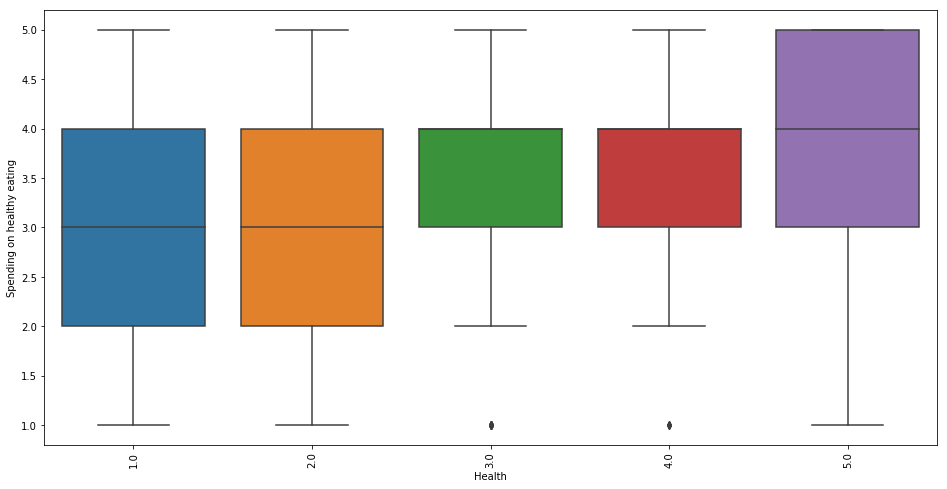

In [233]:
var = 'Health'
box_data2 = pd.concat([new_data['Spending on healthy eating'], new_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Spending on healthy eating", data=box_data2)
plt.xticks(rotation=90);

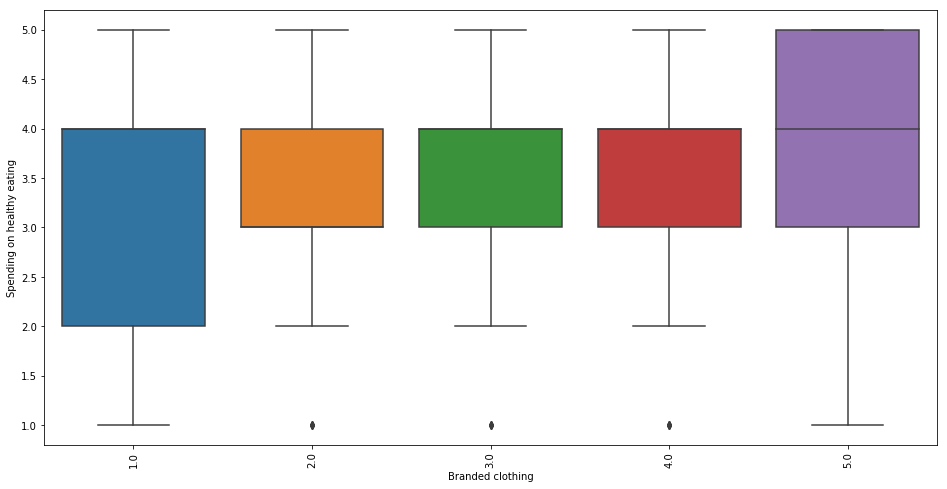

In [234]:
var = 'Branded clothing'
box_data = pd.concat([new_data['Spending on healthy eating'], new_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Spending on healthy eating", data=box_data)
plt.xticks(rotation=90);

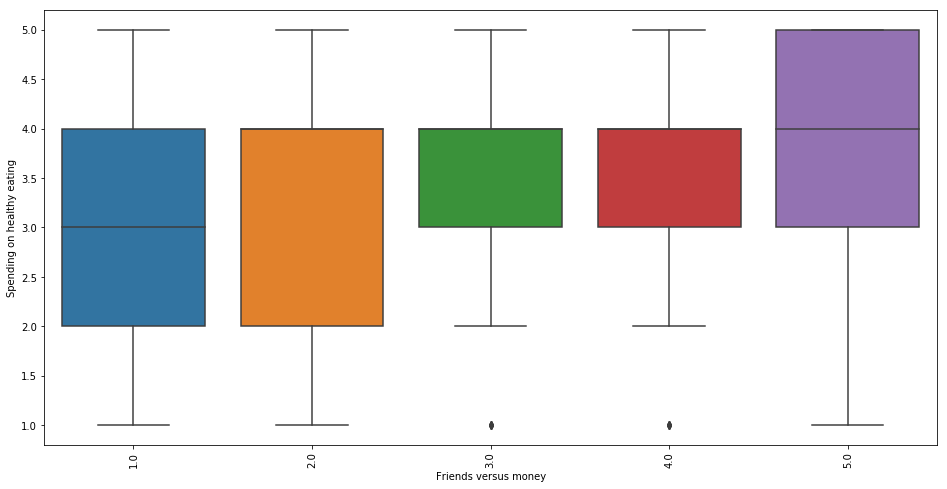

In [235]:
var = 'Friends versus money'
box_data1 = pd.concat([new_data['Spending on healthy eating'], new_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Spending on healthy eating", data=box_data1)
plt.xticks(rotation=90);

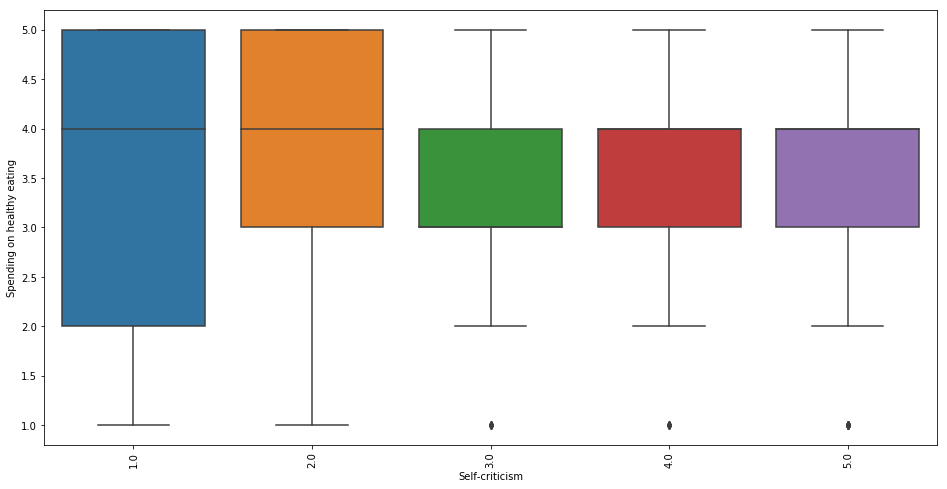

In [236]:
var = 'Self-criticism'
box_data1 = pd.concat([new_data['Spending on healthy eating'], new_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Spending on healthy eating", data=box_data1)
plt.xticks(rotation=90);

Here we have picked up some of the positive correlation coefficient variables for analysis.These features are linguistically and as per the information from columns dataset likely to show some variation and useful analysis with target feature.So here we see that for high positive correlation coefficient values(comparitively).We see similar results as in with increase in preference of that variable the feature of interest variable also shows a increase in value.
<br/>
For the case of friends vs money people whoose desire is to have more than friends as we can see in this useful insight they are more likely to spend on Healthy food.
<br/>But if we go for little lower correlation coefficient values like Self-criticism as people who criticize their decision might just improvise and start eating healthy next time.But here we see less self-critic people spend on healthy eating.And the data is well distributed over lower values of self-criticism than for higher values.

##### Predicting probability of Youth spending on Healthy food 

In [237]:
success=len(new_data[(new_data['Healthy eating'] == 5) |  (new_data['Spending on looks'] ==5 ) |
             (new_data['Spending on gadgets'] ==5) | (new_data['Health'] == 5) |
             (new_data['Branded clothing'] == 5 )]
            [new_data['Spending on healthy eating']==5])
total_data = float(len(new_data))
probab_success = success/total_data*100
probab_success

13.465346534653467

Using the most positive correlation coefficient variabl's which we will refer to as strong variables we predict the how much is probability that if people lead a healthy lifestyle or Spend on looks or spend on gadgets or if they prefer branded clothing then the probability estimate of they spending on Healthy eating is only 13.4%.


<br/>
So our aim for the model would be  13.4% or better accuracy of prediction

## 4.Data Prediction(Modeling) 

<b>(b)what ML	solution did	you	 choose	and,	most	importantly, why was this an appropriate	choice?</b>

Importing classifcation library to train our data.

In [238]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Splitting data just after cleaning into train/dev/test.So here I have taken 0.4 has training size.Therefore, my test data will be 20% and development data will be 20%.So that we have enough data to train as we have asked to tune the parameters of model on dev data

In [239]:
X = new_data
y = new_data['Spending on healthy eating']
# we choose random_state as 2015 so that we get same train test split everythime
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=2015)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [240]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)  
X_val_scale = scaler.transform(X_val)
X_test_scale = scaler.transform(X_test) 

Here for this large dataset I have used ExtraTreeClassifier of scikit learn also known as Extremely randomized trees.The benefit of it is improved accuracy and faster computation.At each iteration it picks up the entire sample and chooses decision boundary at random.Instead of cut point variance it uses cut point smoothing for classification.

In [241]:
from sklearn.ensemble import ExtraTreesClassifier
#they are useful for large datset they are faster in computation  than RandomForest and always test random splits 
#so will give better accuracy dut to smoothing.They generalize very well as seen through experiments
model_ExtraTree = ExtraTreesClassifier()
model_ExtraTree.fit(X_val, y_val)
print("Imporatance of Feature: %s") % model_ExtraTree.feature_importances_


Imporatance of Feature: [0.00968641 0.00764607 0.00310557 0.00531202 0.00202243 0.00160029
 0.00665461 0.00794621 0.00376396 0.00266818 0.00334824 0.001573
 0.00961649 0.00566969 0.00729186 0.00679038 0.00254814 0.0033033
 0.005845   0.00375273 0.00551875 0.00854616 0.00449266 0.00770636
 0.00542137 0.00501904 0.0055392  0.00158646 0.00876704 0.00599402
 0.00622128 0.00168536 0.00303364 0.00442929 0.00574942 0.01003707
 0.0082241  0.00816806 0.00369869 0.00544803 0.00407856 0.00868404
 0.00448829 0.0046366  0.00804723 0.0082974  0.00470781 0.00468315
 0.00515879 0.00911359 0.00777799 0.004348   0.01624929 0.0065847
 0.00117975 0.0061901  0.00432166 0.0071855  0.01061115 0.00601702
 0.00391186 0.005044   0.00330829 0.00590956 0.00599785 0.00944655
 0.00417291 0.00956396 0.00637466 0.00829992 0.00896682 0.00433859
 0.00250931 0.00467084 0.00201732 0.00512409 0.00767382 0.00509652
 0.00639715 0.00904191 0.00710001 0.00251137 0.00216244 0.0074846
 0.00669788 0.00874179 0.00305451 0.0030860

Now we split this important data again into Training, validation and test data accordingly in orderm to perform classification.

In [242]:
from sklearn.feature_selection import RFE
#Ref:http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE
#making to select half of the features after recursive feature extraction 
#here we use the above ExtreTreeClassifier model as it gives us reasonable accuracy due to smoothing(described above)
#we remove half features here to improve further accuracy
rfe = RFE(model_ExtraTree,n_features_to_select=200,step=1)
classifier_rfe = rfe.fit(X_val, y_val)

In [243]:
classifier_rfe.score(X_test,y_test)

0.49504950495049505

#### 4.1 Feature Selecction

In [244]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Ref:http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
#here I chose Chi Square function becuase it selects the highest value of 50 features.Also as we know 
#chi-squared stats are representative of dependence between stochastive variables
#thus it weeds out variables independent of class and thus selects only top 50 as per training 
test = SelectKBest(score_func=chi2, k=50)
fit = test.fit(X_val, y_val)

Here I haved used the ScikitLearn SelectKBest library to extract best features from the dataset.Hence we finally select those columns and use it as important data.As these features will have higher probability to predict the target variable(spending on healthy eating) because these features proved a higher F Score as shown below basis the Y value which is the target variable.Most of the features(columns) are also listed below.

In [245]:
X_new = test.fit_transform(X_val, y_val)
names = X_train.columns.values[fit.get_support()]
scores = fit.scores_[fit.get_support()]
#taking the names of cloumns and their score for better results
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted.head(150))

                        Feat_names   F_Scores
41      Spending on healthy eating  61.810512
39               Spending on looks  12.734766
38                Branded clothing  12.212238
7                        Chemistry  10.610556
21                          Ageing   9.811268
2                       Only child   9.662817
44                     Hiphop, Rap   9.238799
19               Adrenaline sports   7.157506
8                        Geography   7.032620
26                       Elections   6.968192
10                             Law   6.905230
0                           Weight   6.348972
36            Interests or hobbies   6.066076
13                         Dancing   5.893780
5               Economy Management   5.797849
23                  Healthy eating   5.731857
25                     Workaholism   5.552407
4                          Physics   5.510837
3                          History   5.495678
18          Science and technology   5.304482
37                Shopping centres

Taking those columns which were taken out as best related to the Target variable

In [246]:
important_data = new_data[names[:20]].copy()

Now we split this important data again into Training, validation and test data accordingly in orderm to perform classification.

In [247]:
X = important_data
y = new_data['Spending on healthy eating']
# we choose random_state as 2015 so that we get same train test split everythime
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X, y,test_size=0.4,random_state=2015)
X_test_imp, X_val_imp, y_test_imp, y_val_imp = train_test_split(X_test, y_test, test_size=0.5)

In [248]:
scaler = StandardScaler()  
scaler.fit(X_train_imp)
X_train_imp_scale = scaler.transform(X_train_imp)  


In [249]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# selecting only Logistic regression to probabilistically compute decision boundaries
#after we have only selected important features
model = LogisticRegression()
fit = model.fit(X_val_imp, y_val_imp)

In [250]:
fit.score(X_test_imp,y_test_imp)

0.48514851485148514

## 5. Prediction and Data Validation 

## 5.1 Validation Data

In [251]:
y_pred=classifier_rfe.predict(X_test_scale)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3.,
       1., 1., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1.])

Here as we have selected very few columns based on F Score with target class so prediction is better

In [252]:
y_pred_imp=fit.predict(X_test_imp)
y_pred_imp

array([5., 3., 4., 5., 3., 3., 4., 5., 3., 3., 3., 3., 5., 4., 3., 5., 3.,
       3., 3., 2., 3., 5., 3., 5., 5., 3., 3., 2., 2., 5., 4., 5., 3., 4.,
       3., 3., 4., 5., 4., 4., 5., 2., 2., 5., 3., 5., 3., 3., 3., 3., 5.,
       3., 4., 4., 3., 5., 5., 4., 4., 4., 5., 4., 3., 4., 5., 2., 3., 5.,
       2., 5., 3., 3., 3., 2., 4., 2., 3., 3., 5., 3., 3., 4., 5., 5., 3.,
       4., 5., 3., 4., 3., 3., 5., 4., 3., 3., 4., 1., 4., 3., 3., 4.])

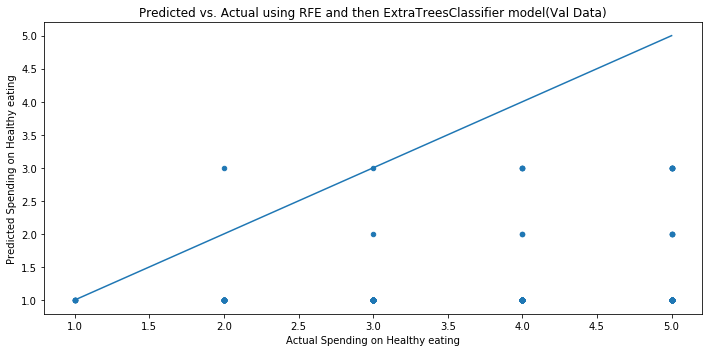

In [253]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test,y_pred,s=20)
plt.title('Predicted vs. Actual using RFE and then ExtraTreesClassifier model(Val Data)')
plt.xlabel('Actual Spending on Healthy eating')
plt.ylabel('Predicted Spending on Healthy eating')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

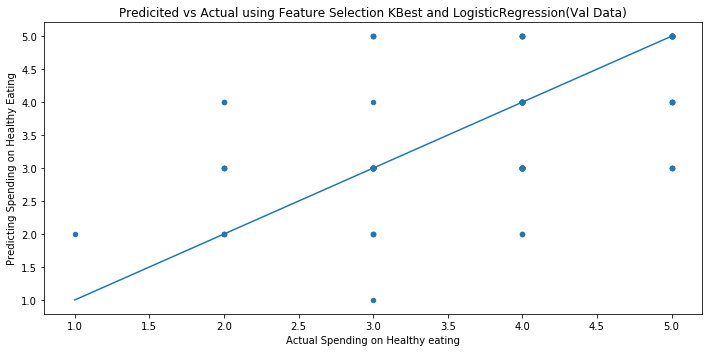

In [254]:
plt.figure(figsize=(10,5))
plt.scatter(y_test_imp,y_pred_imp,s=20)
plt.title('Predicited vs Actual using Feature Selection KBest and LogisticRegression(Val Data)')
plt.xlabel('Actual Spending on Healthy eating')
plt.ylabel('Predicting Spending on Healthy Eating')
plt.plot([min(y_test_imp),max(y_test_imp)],[min(y_test_imp),max(y_test_imp)])
plt.tight_layout()

<b>(c)how did you choose to evaluate success?</b>

Ans 5.2.1 and 5.2.2

## 5.2.1 Classification Metrics 
### Classification Accuracy

Classification accuracy is the fraction of the predictions our model got right.As this is not enough so we use regression metrics to ensure the metric we used give sufficient evalutation of the model as it becomes desirable to select a model because of it's greater predictive power but in practice we may find that it has very low accuracy.

In [255]:
#Ref:http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from sklearn import model_selection
kFold = model_selection.KFold(n_splits=20,random_state=2015)
results = model_selection.cross_val_score(model_ExtraTree,X_train_scale,y_train,cv=kFold,scoring='accuracy')
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

Accuracy: 0.636 (0.106)


In [256]:
from sklearn import model_selection
kFold = model_selection.KFold(n_splits=20,random_state=2015)
results = model_selection.cross_val_score(model,X_train_imp,y_train_imp,cv=kFold,scoring='accuracy')
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

Accuracy: 0.322 (0.079)


## 5.2.2 Regression Metrics

###  Mean Absolute Error

As mean absolute error gives us the magnitude of error our classification algorithm made while predictions.It refers to the mean of absolute value of error prediction on the entire test dataset.Prediction error is taken for each value so here we have to assume taking the mod.

In [267]:
#Ref:http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error
from sklearn import model_selection
kFold = model_selection.KFold(n_splits=20,random_state=2015)
results = model_selection.cross_val_score(model_ExtraTree,X_train_scale,y_train,cv=kFold,scoring='neg_mean_absolute_error')
print("Neg. MAE: %.3f (%.3f)") % (abs(results).mean(), abs(results).std())

Neg. MAE: 0.528 (0.155)


In [268]:
from sklearn import model_selection
kFold = model_selection.KFold(n_splits=20,random_state=2015)
results = model_selection.cross_val_score(model,X_train_imp,y_train_imp,cv=kFold,scoring='neg_mean_absolute_error')
print("Neg. MAE: %.3f (%.3f)") % (abs(results).mean(), abs(results).std())

Neg. MAE: 0.960 (0.107)


# 6. Conclusion


In this model we see that RFE performs better at times.But the chosing best features(Feature selection algorithm) also give reasonable accuracy.We see that we get a good Accuracy and MAE on both.This is only because I chose the right features everytime to predict.For future implementation I would try to fine tune the accuracy so as to be able to predict better.I would make my own class/function rather than use Scikit learn library.

<b>(f)show some examples from the development data that your approach got correct and some it got wrong: if you were to try to fix the ones it got wrong, what would you do?</b>

Some examples from my development data which is shown here in X_val,Y_val,X_val_imp and Y_val_imp for the two models respectively.Show the y_pred and y_pred_imp as you can see above it correctly predicts y_pred sometimes but due to inaccuracy falter sometimes.So I would make my own function to Classify and improve accuracy.
